In [ ]:
### 🔧 TAREA
#Antes de entrenar la red neuronal, modifica los hiperparámetros en `config.yaml`, especialmente:
#- `hidden_layers`: cambia el número de capas o neuronas.
#- `activation`: prueba funciones como `tanh` o `elu`.
#- `epochs`: aumenta o reduce el número de épocas.
#
#Luego, vuelve a ejecutar este notebook y observa cómo cambia el rendimiento.

In [1]:
import os
print(os.getcwd())

import sys
sys.path.append("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/src")

import train
import model
import utils
import evaluate as ev
import pandas as pd
import numpy as np
import yaml

/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/notebooks


In [2]:
# 🔧 Cargar configuración
config = train.load_config("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/DeepNeuralNetworkUSS/Projects/Credit/data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [5]:
# 🧠 Construir el modelo
input_dim = X_train.shape[1]
nn_model = model.build_model(config, input_dim)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 🚀 Entrenar el modelo
history = train.train_model(nn_model, X_train, y_train, config)

Epoch 1/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6674 - loss: 0.8216 - val_accuracy: 0.7345 - val_loss: 0.6451
Epoch 2/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7427 - loss: 0.6230 - val_accuracy: 0.7507 - val_loss: 0.5903
Epoch 3/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7428 - loss: 0.5880 - val_accuracy: 0.7378 - val_loss: 0.5788
Epoch 4/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7573 - loss: 0.5615 - val_accuracy: 0.7564 - val_loss: 0.5562
Epoch 5/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7543 - loss: 0.5525 - val_accuracy: 0.7515 - val_loss: 0.5635
Epoch 6/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7543 - loss: 0.5451 - val_accuracy: 0.7543 - val_loss: 0.5420
Epoch 7/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7587 - loss: 0.5361 - val_accuracy: 0.7528 - val_loss: 0.5386
Epoch 8/100
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7618 - loss: 0.5319 - val_accu

In [9]:
# 💾 Guardar modelo entrenado
utils.save_model(nn_model, path="../models/nn3_model.keras")

✅ Modelo guardado en ../models/nn3_model.keras


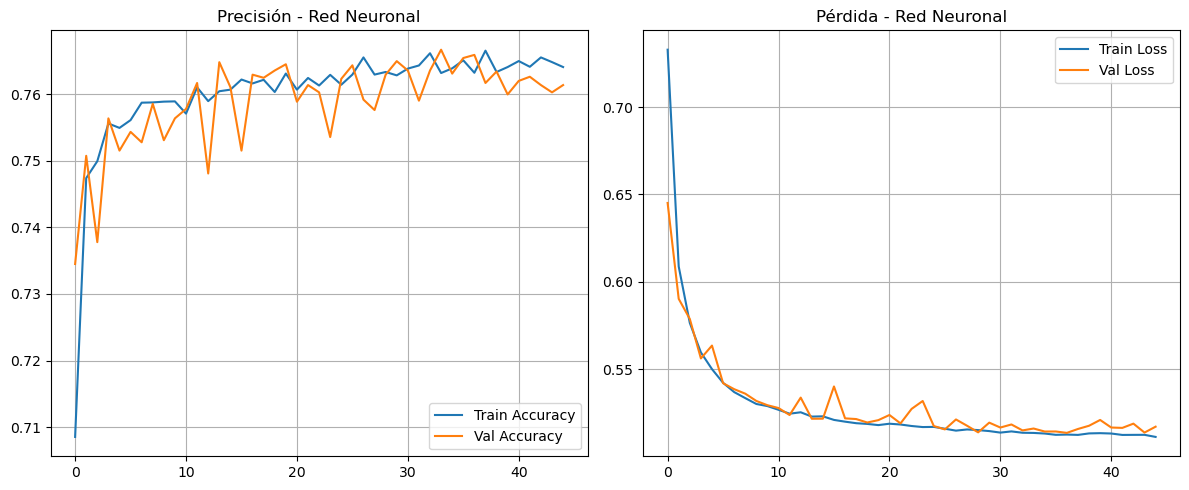

In [11]:
# 📈 Visualizar evolución del entrenamiento
utils.plot_training_history(history, model_name="Red Neuronal")

In [ ]:
### 📊 Pregunta de reflexión
# ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?  

# No parecieran estár sobreajustadas las curvas, mantienen buena relación y un comportamiento similar

# ¿Cuál fue la época donde la validación alcanzó su mejor punto?  

#33

# ¿Qué pasaría si entrenaras con más (o menos) datos?

#con más datos quizás mejoraría la generalización del modelo, podría estabilizar mejor el val_accuracy.
#con menos datos aummentaría el sobreajuste pues el modelo memorizaría patrones 

In [17]:
best_epoch = np.argmax(history.history["val_accuracy"])
best_val_acc = history.history["val_accuracy"][best_epoch]

print(f" Mejor época: {best_epoch}")
print(f" Mejor val_accuracy: {best_val_acc:.4f}")


 Mejor época: 33
 Mejor val_accuracy: 0.7667


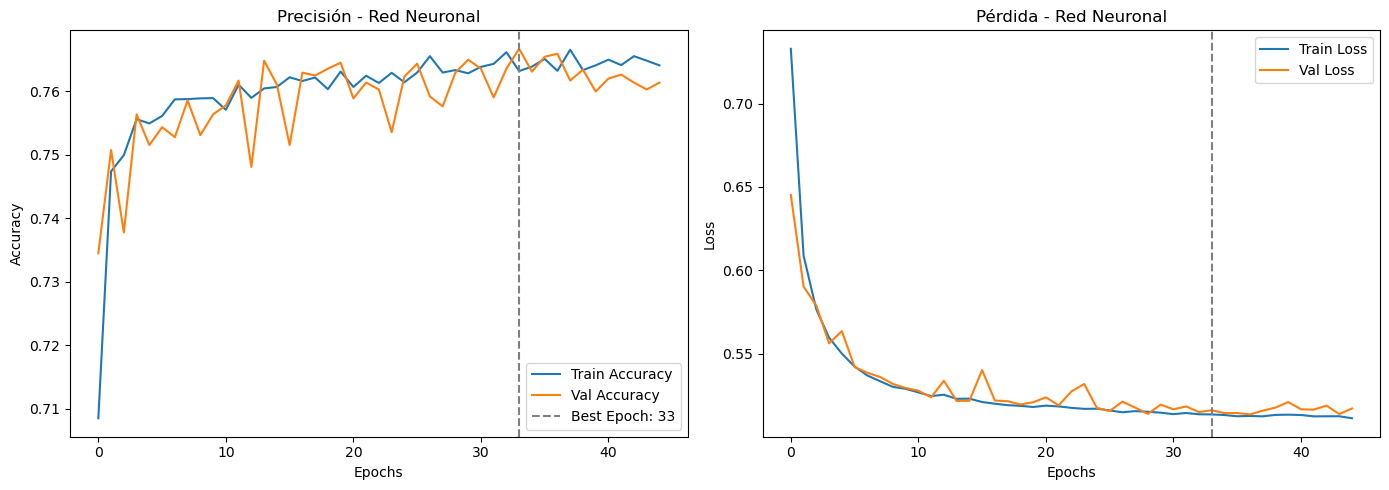

In [19]:
epochs = range(len(history.history["accuracy"]))
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

best_epoch = np.argmax(val_acc)

# Gráfico de precisión
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Val Accuracy")
plt.axvline(best_epoch, color='gray', linestyle='--', label=f"Best Epoch: {best_epoch}")
plt.title("Precisión - Red Neuronal")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Val Loss")
plt.axvline(best_epoch, color='gray', linestyle='--')
plt.title("Pérdida - Red Neuronal")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
